In [65]:
#!pip install mlxtend

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Set seed for reproducibility
np.random.seed(45)

In [59]:
# Function to generate data for each class
def generate_class_data(class_name, num_samples):
    income_mean, income_std = 50000, 20000
    spend_mean,  spend_std  = 50000, 20000
    
    if class_name == 'ES':
        income = np.random.normal(20000, 10000, num_samples)
        spend = np.random.normal(20000, 10000, num_samples)
    elif class_name == 'SC':
        income = np.random.normal(80000, 10000, num_samples)
        spend = np.random.normal(20000, 10000, num_samples)
    elif class_name == 'RC':
        income = np.random.normal(20000, 10000, num_samples)
        spend = np.random.normal(80000, 10000, num_samples)
    elif class_name == 'PC':
        income = np.random.normal(80000, 10000, num_samples)
        spend = np.random.normal(80000, 10000, num_samples)
    
    return income, spend

In [60]:
# Generate data for each class
num_samples_per_class = 250
es_income, es_spend = generate_class_data('ES', num_samples_per_class)
sc_income, sc_spend = generate_class_data('SC', num_samples_per_class)
rc_income, rc_spend = generate_class_data('RC', num_samples_per_class)
pc_income, pc_spend = generate_class_data('PC', num_samples_per_class)

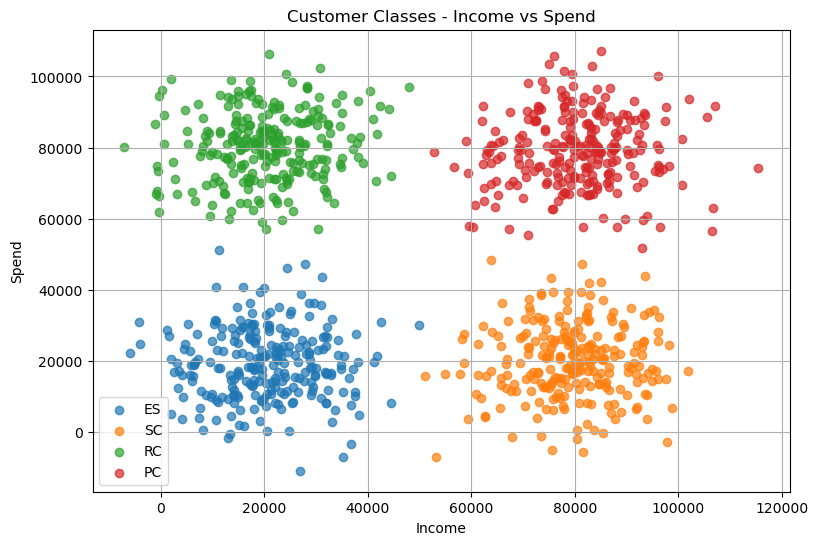

In [61]:
# Plot the data
plt.figure(figsize=(9, 6))

plt.scatter(es_income, es_spend, label='ES', alpha=0.7)
plt.scatter(sc_income, sc_spend, label='SC', alpha=0.7)
plt.scatter(rc_income, rc_spend, label='RC', alpha=0.7)
plt.scatter(pc_income, pc_spend, label='PC', alpha=0.7)

plt.title('Customer Classes - Income vs Spend')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.legend()
plt.grid(True)

In [30]:
#pip install mlxtend

In [62]:
import pandas as pd

In [63]:
# Create DataFrames for each class
es_df = pd.DataFrame({'Income': es_income, 'Spend': es_spend, 'Class': 'ES'})
sc_df = pd.DataFrame({'Income': sc_income, 'Spend': sc_spend, 'Class': 'SC'})
rc_df = pd.DataFrame({'Income': rc_income, 'Spend': rc_spend, 'Class': 'RC'})
pc_df = pd.DataFrame({'Income': pc_income, 'Spend': pc_spend, 'Class': 'PC'})

# Concatenate the DataFrames into a single DataFrame
df = pd.concat([es_df, sc_df, rc_df, pc_df], ignore_index=True)

In [64]:
df.shape

(1000, 3)

In [34]:
df.sample(15)

,Income,Spend,Class
113,44465.932683,7993.972780,ES
437,85058.395947,20409.681284,SC
84,19147.625314,3158.810718,ES
745,32197.838370,86453.292523,RC
810,79944.108511,79354.597686,PC
180,18172.209952,10335.234258,ES
571,19801.539234,80897.348052,RC
966,90638.608383,87665.785821,PC
42,11458.116468,18048.053772,ES
533,19671.282222,78117.951906,RC


In [66]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions

import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

In [67]:
# Map 'Class' to 'target' column
class_mapping = {'ES': 0, 'SC': 1, 'RC': 2, 'PC': 3}

df['target']  = df['Class'].map(class_mapping)

In [68]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [69]:
# Function to plot decision boundaries
def plot_decision_boundaries(n_neighbors):
    knn.n_neighbors = n_neighbors
    knn.fit(df[['Income', 'Spend']], df['target'])
    plt.figure(figsize=(9, 6))

    # Plot decision boundaries
    plot_decision_regions(X=np.array(df[['Income', 'Spend']]), 
                          y=np.array(df['target']), 
                          clf=knn, 
                          feature_index=[0, 1],  # Specify the indices of feature columns
                          filler_feature_values={2: 0},  # Specify the filler feature values
                          legend=4)

    # # Plot the data points
    # plt.scatter(df[df['Class'] == 'ES']['Income'], df[df['Class'] == 'ES']['Spend'], label='ES', alpha=0.7)
    # plt.scatter(df[df['Class'] == 'SC']['Income'], df[df['Class'] == 'SC']['Spend'], label='SC', alpha=0.7)
    # plt.scatter(df[df['Class'] == 'RC']['Income'], df[df['Class'] == 'RC']['Spend'], label='RC', alpha=0.7)
    # plt.scatter(df[df['Class'] == 'PC']['Income'], df[df['Class'] == 'PC']['Spend'], label='PC', alpha=0.7)

    plt.title(f'Decision Boundaries for KNN (n_neighbors={n_neighbors})')
    plt.xlabel('Income')
    plt.ylabel('Spend')
    plt.legend()
    plt.grid(True)
    plt.show()


In [70]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [71]:
# Create interactive widget
interactive_plot = interactive(plot_decision_boundaries, n_neighbors=(1, 30, 1))

In [72]:
output = interactive_plot.children[-1]


In [73]:
output.layout.height = '500px'
display(interactive_plot)

interactive(children=(IntSlider(value=15, description='n_neighbors', max=30, min=1), Output(layout=Layout(heig…

#### Simple prediction

In [74]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df[['Income', 'Spend']], df['target'])

KNeighborsClassifier()

In [75]:
# Dummy row
dummy_row = np.array([[50000, 20000]])  # Adjust the values based on your scenario

# Assuming you have a trained KNN model
# Replace 'YourModelClass' with the actual class of your KNN model
predicted_class = knn.predict(dummy_row)
prediction_probabilities = knn.predict_proba(dummy_row)

# Print the results
print("Predicted Class:", predicted_class)
print("Prediction Probabilities:", prediction_probabilities)

Predicted Class: [1]
Prediction Probabilities: [[0.2 0.8 0.  0. ]]


#### a customer very unlike existing 4 types

In [76]:
# Generate a customer with extreme values
new_customer = pd.DataFrame({'Income': [150000], 'Spend': [5000], 'Class': 'Unknown'})

# Map 'Class' to 'target' column
new_customer['target'] = new_customer['Class'].map(class_mapping)

# Display the new customer
print("New Customer:")
print(new_customer)

# Predict the class and probabilities for the new customer
new_customer_features = new_customer[['Income', 'Spend']].values
predicted_class = knn.predict(new_customer_features)
prediction_probabilities = knn.predict_proba(new_customer_features)

# Display the prediction results
print("\nPrediction Results:")
print("Predicted Class:", predicted_class)
print("Prediction Probabilities:", prediction_probabilities)

New Customer:
   Income  Spend    Class  target
0  150000   5000  Unknown     NaN

Prediction Results:
Predicted Class: [1]
Prediction Probabilities: [[0. 1. 0. 0.]]


In [46]:
# Function to plot decision boundaries with selected point
def plot_decision_boundaries(selected_income, selected_spend):
    plt.figure(figsize=(9, 6))

    # Plot decision regions
    plot_decision_regions(X=np.array(df[['Income', 'Spend']]), 
                          y=np.array(df['target']), 
                          clf=knn, 
                          feature_index=[0, 1],
                          filler_feature_values={2: 0},
                          legend=4)

    # Plot the selected point
    plt.scatter(selected_income, selected_spend, color='k', marker='X', s=200, label='Selected Point')

    # Predict the customer type for the selected point
    prediction    = knn.predict([[selected_income, selected_spend]])
    probabilities = knn.predict_proba([[selected_income, selected_spend]])[0]
    
    # Display the prediction and probabilities in the title
    title = f'Decision Regions - Predicted Customer Type: {prediction[0]}'
    title += f'\nProbabilities: ES={probabilities[0]:.2f}, SC={probabilities[1]:.2f}, RC={probabilities[2]:.2f}, PC={probabilities[3]:.2f}'

    plt.title(title)
    plt.xlabel('Income')
    plt.ylabel('Spend')
    plt.xlim([0, 150000])
    plt.ylim([0, 150000])
    plt.legend()
    plt.grid(True)
    plt.show()

In [47]:
# Create sliders for Income, Spend
income_slider = widgets.FloatSlider(value=50000, min=0,  max=150000, step=1000, description='Income:')
spend_slider = widgets.FloatSlider(value =50000, min=0,  max=150000, step=1000, description='Spend:')

In [48]:
# Create interactive widget with updated sliders
interactive_plot = interactive(plot_decision_boundaries, 
                                selected_income=income_slider,
                                selected_spend=spend_slider)

# Set the layout
output = interactive_plot.children[-1]
output.layout.height = '500px'

# Display the interactive widget
display(interactive_plot)

interactive(children=(FloatSlider(value=50000.0, description='Income:', max=150000.0, step=1000.0), FloatSlide…

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Set seed for reproducibility
np.random.seed(42)

In [50]:
# Generate 20 random samples for 'Actual Label' and 'Predicted Label'
actual_labels = np.random.choice([0, 1, 2, 3], size=20)
predicted_labels = np.random.choice([0, 1, 2, 3], size=20)

# Create a dataframe
df = pd.DataFrame({'Actual Label': actual_labels, 'Predicted Label': predicted_labels})

In [51]:
print('Acutal Labels')
df['Actual Label'].values

Acutal Labels


array([2, 3, 0, 2, 2, 3, 0, 0, 2, 1, 2, 2, 2, 2, 3, 0, 3, 3, 3, 2])

In [52]:
print('Predicted Label')
df['Predicted Label'].values

Predicted Label


array([1, 0, 1, 3, 3, 1, 1, 1, 3, 3, 0, 0, 3, 1, 1, 0, 3, 0, 0, 2])

In [53]:
# Calculate accuracy
accuracy = accuracy_score(df['Actual Label'], df['Predicted Label'])

print(f"Actual Labels: {actual_labels}")
print(f"Predicted Labels: {predicted_labels}")
print(f"Accuracy: {accuracy:.2%}")

Actual Labels: [2 3 0 2 2 3 0 0 2 1 2 2 2 2 3 0 3 3 3 2]
Predicted Labels: [1 0 1 3 3 1 1 1 3 3 0 0 3 1 1 0 3 0 0 2]
Accuracy: 15.00%


In [54]:
# Calculate confusion matrix
cm = confusion_matrix(df['Actual Label'], df['Predicted Label'])

In [55]:
cm

array([[1, 3, 0, 0],
       [0, 0, 0, 1],
       [2, 2, 1, 4],
       [3, 2, 0, 1]], dtype=int64)

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

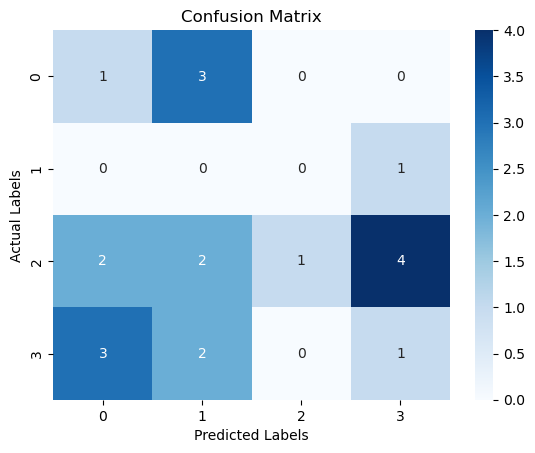

In [171]:
# Display confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix");

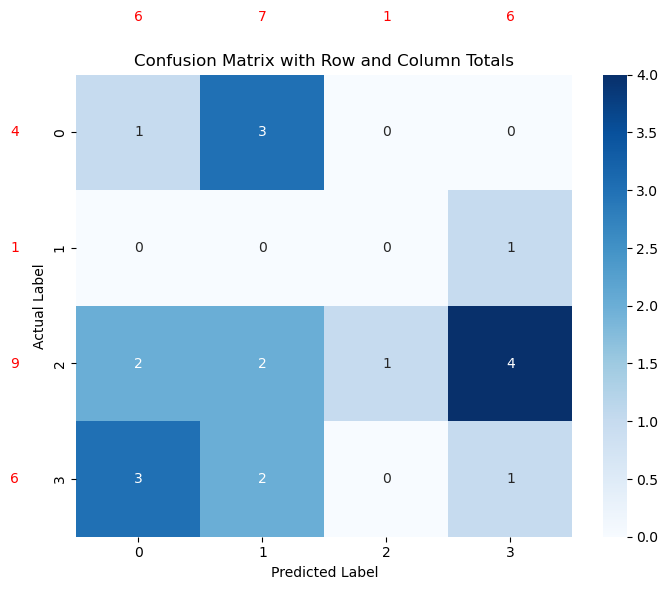

In [173]:
# Create confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Calculate row and column totals
row_totals = cm.sum(axis=1)
col_totals = cm.sum(axis=0)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])

# Display row totals
for i in range(len(row_totals)):
    plt.text(-0.5, i + 0.5, row_totals[i], ha="center", va="center", color="red")

# Display column totals
for i in range(len(col_totals)):
    plt.text(i + 0.5, -0.5, col_totals[i], ha="center", va="center", color="red")

plt.title("Confusion Matrix with Row and Column Totals")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label");

In [174]:
# Calculate recall for each class
recall_per_class = np.diag(cm) / np.sum(cm, axis=1)

# Print recall for each class
for i, recall in enumerate(recall_per_class):
    print(f"Class {i}: Recall = {recall:.2f}")

Class 0: Recall = 0.25
Class 1: Recall = 0.00
Class 2: Recall = 0.11
Class 3: Recall = 0.17


#### Apply cross_validate

In [190]:
from sklearn.model_selection import cross_validate

In [191]:
df.shape

(1000, 4)

In [192]:
df.sample(5)

,Income,Spend,Class,target
329,83582.422468,17057.835465,SC,1
327,85373.999578,37176.843254,SC,1
367,76788.390265,10910.510504,SC,1
509,20706.868164,89472.762699,RC,2
641,17118.985075,98661.687592,RC,2


In [193]:
X = df[['Income', 'Spend']]
y = df.target

In [194]:
knn = KNeighborsClassifier()

In [195]:
# Perform cross-validation using cross_validate
cv_results = cross_validate(knn, 
                            X, 
                            y, 
                            cv=5, 
                            scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], 
                            return_train_score=True)

In [200]:
# Print the cross-validation results
print("test data")
print("Accuracy:", cv_results['test_accuracy'].mean())
#print("Precision:", cv_results['test_precision_macro'].mean())
print("Recall:", cv_results['test_recall_macro'].mean())
#print("F1 Score:", cv_results['test_f1_macro'].mean())
print()
print("Train data")
print("Accuracy:", cv_results['train_accuracy'].mean())
#print("Precision:", cv_results['train_precision_macro'].mean())
print("Recall:", cv_results['train_recall_macro'].mean())
#print("F1 Score:", cv_results['train_f1_macro'].mean())

test data
Accuracy: 0.998
Recall: 0.998

Train data
Accuracy: 0.998
Recall: 0.998


In [201]:
from sklearn.model_selection import learning_curve

In [204]:
# Create learning curves
train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

In [205]:
# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

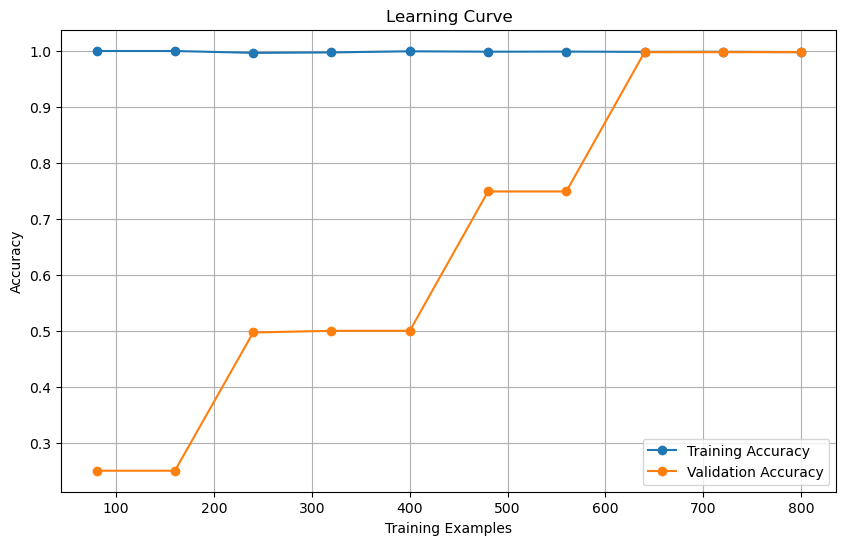

In [206]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()